# Лабораторная работа №2

### РЕШЕНИЕ КРАЕВЫХ ЗАДАЧ. МЕТОДЫ КОЛЛОКАЦИЙ, НАИМЕНЬШИХ КВАДРАТОВ И ГАЛЕРКИНА ###

Задание 1) 
$$\begin{eqnarray}
y'' &+& (1 &+& x^2)y &=& -1 \\
\end{eqnarray}$$
Задание 2)
$$ay'' + (1 + bx^2)y = -1 $$
Исходные данные:
$$a = \sin(k)$$
$$b = \cos(k), $$
где $k = 13$ - номер варианта.


  Краевые условия: $$y(1) = 0 $$ $$y(-1) = 0 $$

Базисную систему выбрать в виде;
    $$  \varphi_{i}(x) = x^i(1-x^2) ,  i = 0..N $$
    $$ \varphi_{1}(0) = 0 $$
    $$ \varphi_{0}(x) = 1-x^2 $$

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [102]:
phi = lambda x, i : x ** i * (1 - x ** 2) 

def phi_dd(x, i):
    if i < 2:
        return -(i + 2) * (i + 1) * x ** i
    return (i-1) * i * x ** (i-2) - (i + 2) * (i + 1) * x ** i

In [121]:
def func(n, a, b):
    x0 = -1
    xn = 1
    n = 100
    h = (xn - x0)/(n)
    X = np.arange(x0, xn + h, h)
    
    Q = lambda x: (1 + b * x ** 2) / a
    
    matrix = np.array([[phi_dd(x, i) + Q(x) * phi(x, i) for i in range(n + 1)] for x in X])
    col = -np.ones(n + 1) / a
    alpha = np.linalg.solve(matrix, col)
    
    f = lambda x: sum([alpha[i] * phi(x, i) for i in range(n + 1)])
    Y = [f(x) for x in X]
    return X, Y

In [132]:
%%time
X, Y = func(100, 1, 1) 

CPU times: user 130 ms, sys: 36.1 ms, total: 166 ms
Wall time: 115 ms


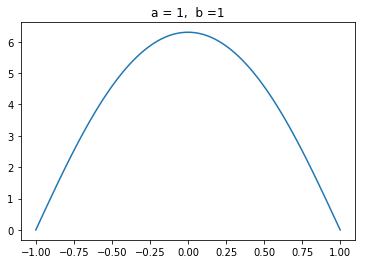

In [133]:
plt.plot(X, Y)
plt.title('a = 1,  b =1')
plt.show()

In [134]:
%time
X, Y = func(100, math.sin(13), math.cos(13)) 

CPU times: user 8 µs, sys: 3 µs, total: 11 µs
Wall time: 21.5 µs


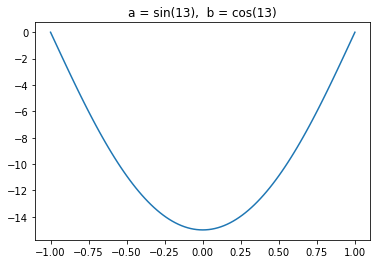

In [136]:
plt.plot(X, Y)
plt.title('a = sin(13),  b = cos(13)')
plt.show()